In [20]:
from Scripts import loading as dl, profiling as pf, preprocessing as prep
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
schema_link = '../Data/amazon_movie.pkl'
amazon_link = '../Data/schema_movie.pkl'

df = dl.load_merged_data(schema_link, amazon_link, 1000,9000)

In [4]:
df[df['text'] == '']

,text,label


In [5]:
df[df.label.isnull()]

,text,label


In [6]:
pf.create_word_count(df)

,text,label,word_count
0,I did not learn after the first movie. I boug...,1.0,102
1,I won't review the movie because this has alre...,1.0,308
2,never explained anything and the ending was th...,1.0,30
3,pathetic acting and unrealistic jujitsu fight ...,1.0,28
4,Incredible (as in unbelievable) that three suc...,1.0,83
...,...,...,...
49995,This is another Hallmark Christmas movie that ...,5.0,231
49996,"""\nReturning to \""The Color Purple\"" after alm...",5.0,1762
49997,"""\n\u201CI knew he was homosexual,\"" the young...",5.0,987
49998,"""\n\t\t\t\t\t\t\n\t\t\t\t\t\tSteven Spielberg\...",5.0,3496


In [7]:
pf.get_longest_review(df)

The longest review text in our sample has 6968 words.
Longest review text:

44087    "\n\t\t\t\t\t\t\n\t\t\t\t\t\tHaving journeyed ...
Name: text, dtype: object 44087    5.0
Name: label, dtype: float64


In [8]:
pf.get_shortest_review(df)

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 6 times.
1330                   Silly.
5733          \nHowlarious.\n
15876    \n...amateurish...\n
17226     \n...train-wreck.\n
19902                \nUgh.\n
22437      \n...amateurish.\n
Name: text, dtype: object 1330     2.0
5733     1.0
15876    2.0
17226    2.0
19902    2.0
22437    2.0
Name: label, dtype: float64


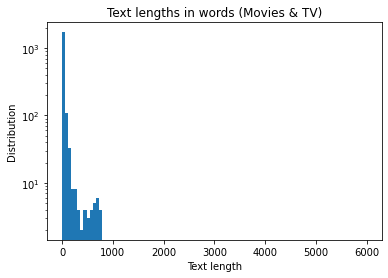

In [9]:
pf.get_word_length_dist(df, 'Movies & TV', True)

In [10]:
# PREPROCESSING
df.text = prep.preprocess_reviews(df.text)

In [11]:
df.iloc[25496].text

'watch film want see differ version devda also sli dig sudhir mishra take dynast polit'

In [11]:
# classifier = LogReg, LinearSVC,
# Feature selection: selectkbest (f_regression, mutual_info_regression, f_classif,

In [12]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=seed, stratify=df.label)

# vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()

print ("Feature size of TF-IDF: ", len(vocab))
test_vectorized = vectorizer.transform(X_test)

Feature size of TF-IDF:  852996


500
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.44856
Precision:0.4475688002086084
F1:0.4424734305459893
col_0   1.0   2.0  3.0  4.0   5.0
label                            
1.0    1564   553  158  101   124
2.0     587  1072  543  143   155
3.0     209   885  842  328   236
4.0     171   490  626  597   616
5.0     139   252  250  327  1532
1000


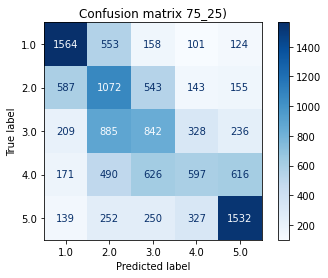

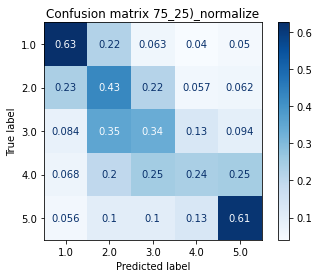

In [ ]:
lst = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for i in lst:
    # vectorizer_chi2 = SelectKBest(chi2,k=3000)
    vectorizer_fs = SelectKBest(score_func=mutual_info_classif, k=i)

    print(i)

    fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
    fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

    # Train the model using the training sets
    # clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')
    clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', verbose=0, random_state=123, max_iter=1000)

    clf.fit(fs_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(fs_test_vectorized)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: 75, text: 25")
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix 75_25)"
    disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()

In [13]:
text_vectorized = vectorizer.fit_transform(df.text)
selected_text_vectorized = vectorizer_fs.fit_transform(text_vectorized,df.label)

results = []
names = []
scoring = 'f1_macro'
models = []

models.append(('LR', LogisticRegression(dual=False, random_state=10, multi_class="multinomial")))
models.append(('SDG', SGDClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('MNB', MultinomialNB()))
models.append(('RND', RandomForestClassifier()))
models.append(('SVM', LinearSVC(multi_class="crammer_singer")))
models.append(('SVC', SVC(decision_function_shape='ovr'))) #takes too long
seed = 7

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, selected_text_vectorized, df.label, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\line

LR: 0.150871 (0.100802)
SDG: 0.144224 (0.096789)
DTC: 0.141495 (0.074343)
MNB: 0.126681 (0.074454)


KeyboardInterrupt: 